<a href="https://colab.research.google.com/github/mechhector/visao_computacional20212/blob/main/trabalho1/q4_laplacian_DIP_20212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Informe o tipo de kernel desejado:0
Dimensões do Kernel: (3, 3)
Dimensões da Imagem: (800, 1200)
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


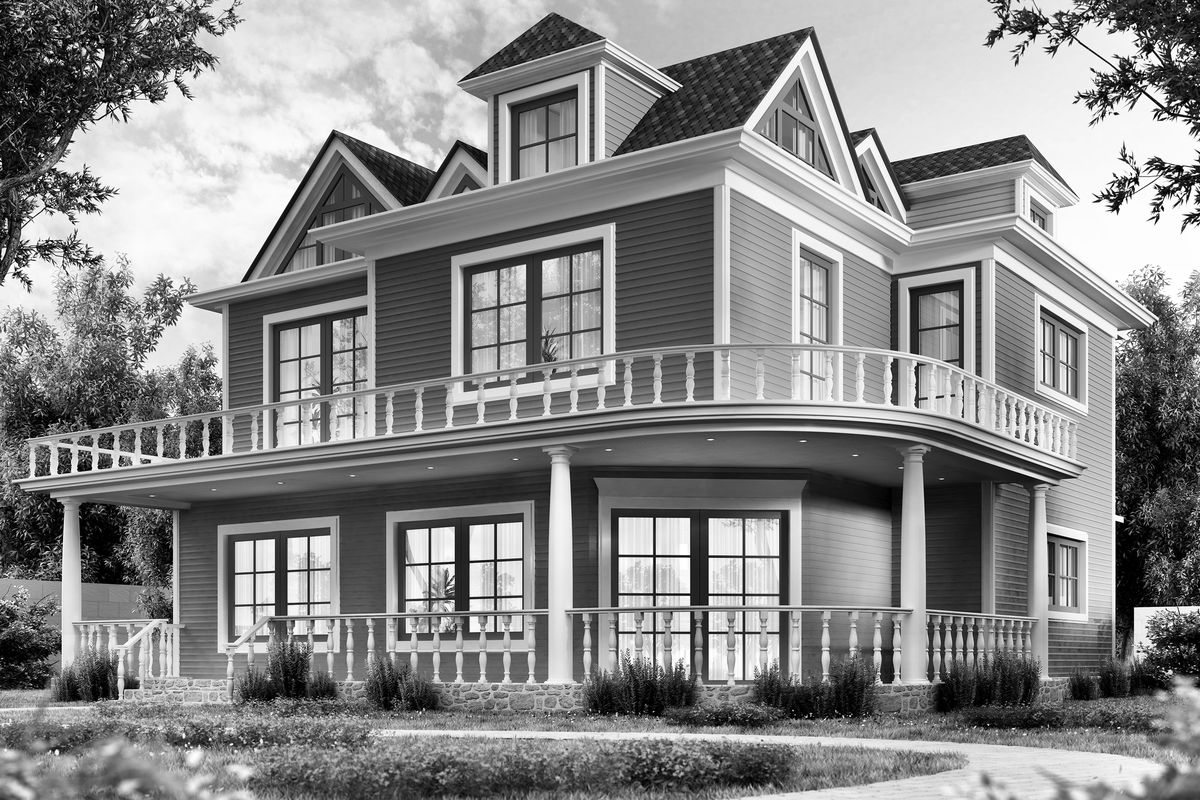

In [ ]:
# PDI 2021.2 Trabalho 1 
# Hector Leonardo Mota Moreira


# Laplacian Operator

import numpy as np
import cv2
import math as m
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow


# ========= Loading the image =========

img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/house_big.jpg', 0)

# ========= Kernel Dimensions ========= 

k = 3

c = (int (k/2)) # Just to simplify 

# ======= Number of Iterations ======== 

n = 1

# =========== Image Content =========== 

image_content = 'casa'

# ======== Creating the Kernel ========

kernel_type = int(input('Informe o tipo de kernel desejado:'))
if kernel_type == 0:

  kernel_laplacian = np.array([[0, 1, 0], [1, -4, 1],[0, 1, 0]])
  k_type = 0

elif kernel_type == 1:
  kernel_laplacian = np.array([[1, 1, 1], [1, -8, 1],[1, 1, 1]])
  k_type = 1

elif kernel_type == 2:
  kernel_laplacian = np.array([[0, -1, 0], [-1, 4, -1],[0, -1, 0]])
  k_type = 2 

else:
  kernel_laplacian =  np.array([[-1, -1, -1], [-1, 8, -1],[-1, -1, -1]])
  k_type = 3

print ('Dimensões do Kernel:', kernel_laplacian.shape)

print ('Dimensões da Imagem:', img.shape)

print (kernel_laplacian)

cv2_imshow(img)

136.6455471139124
(802, 1202)


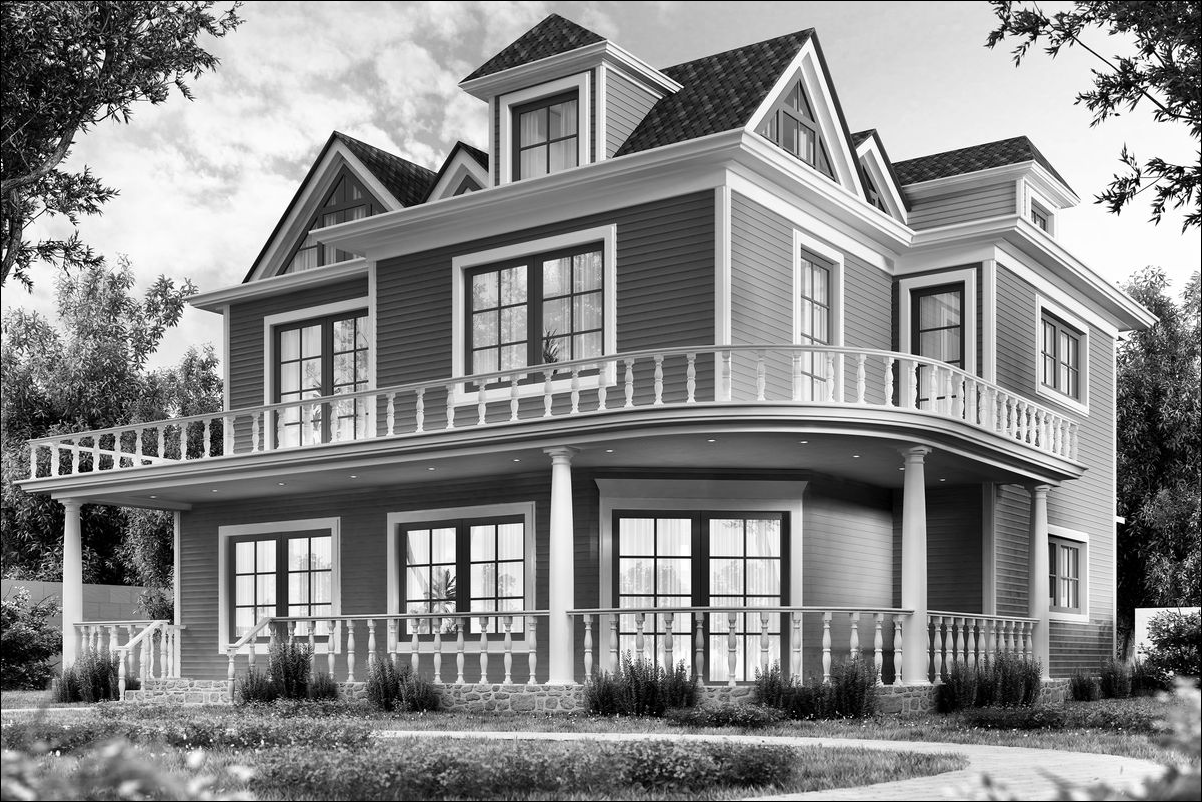

In [ ]:
# ============== Padding ==============

line, column = (img.shape) 

holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

new_line, new_column = (holdpdd.shape)

holdpdd [ c : new_line - c , c : new_column - c ] = img 

print(holdpdd.mean()) 
print (holdpdd.shape)

cv2_imshow(holdpdd)

In [ ]:
# ============ Convolution ============ 
n = 1
laplacian_image = holdpdd.copy() # Based on the Professor Navar's code.

for i in range(n):
  for x in range (c,holdpdd.shape[0]-c):
    for y in range(c,holdpdd.shape[1]-c):
        
      lol = holdpdd[ x - c : x + c + 1 , y - c : y + c + 1 ]
        
      laplacian_conv = (lol*kernel_laplacian).sum()
      
      laplacian_image[x,y] = round(laplacian_conv)
 
      

final_image = np.zeros((line,column))

final_image = laplacian_image [ c : new_line - c , c : new_column - c ]

# range [0,255]

for i in range (0, final_image.shape[0]):
  for j in range (0, final_image.shape[1]):

    if final_image[(i,j)] > 255:

      final_image[(i,j)] = 255

    elif final_image[(i,j)] < 0:
      final_image[(i,j)] = 0


cv2_imshow(final_image)

print(lol)

print('\n',kernel_laplacian)

file_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q4_Laplacian_Filter/{}_laplacian_type_{}_filter.png'

cv2.imwrite(file_name.format(image_content,k_type),final_image)

In [ ]:
# Using OpenCV

laplacian = cv2.Laplacian(img,cv2.CV_64F)
cv2_imshow(laplacian)
print(laplacian)